# 인공 신경망

### 8-1

In [15]:
import keras
keras.layers.Conv2D(10, kernel_size=(3, 3), activation='relu')

<Conv2D name=conv2d_5, built=False>

In [16]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same')

<Conv2D name=conv2d_6, built=False>

In [17]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=1)

<Conv2D name=conv2d_7, built=False>

In [18]:
keras.layers.MaxPooling2D(2)

<MaxPooling2D name=max_pooling2d_4, built=True>

In [19]:
keras.layers.MaxPooling2D(2, strides=2, padding='valid')

<MaxPooling2D name=max_pooling2d_5, built=True>

### 8-2

패션 MNIST 데이터 불러오기

In [20]:
import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled,train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

합성곱 신경망 만들기

In [21]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28,1)))
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same'))

In [22]:
model.add(keras.layers.MaxPooling2D(2))

In [23]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [24]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

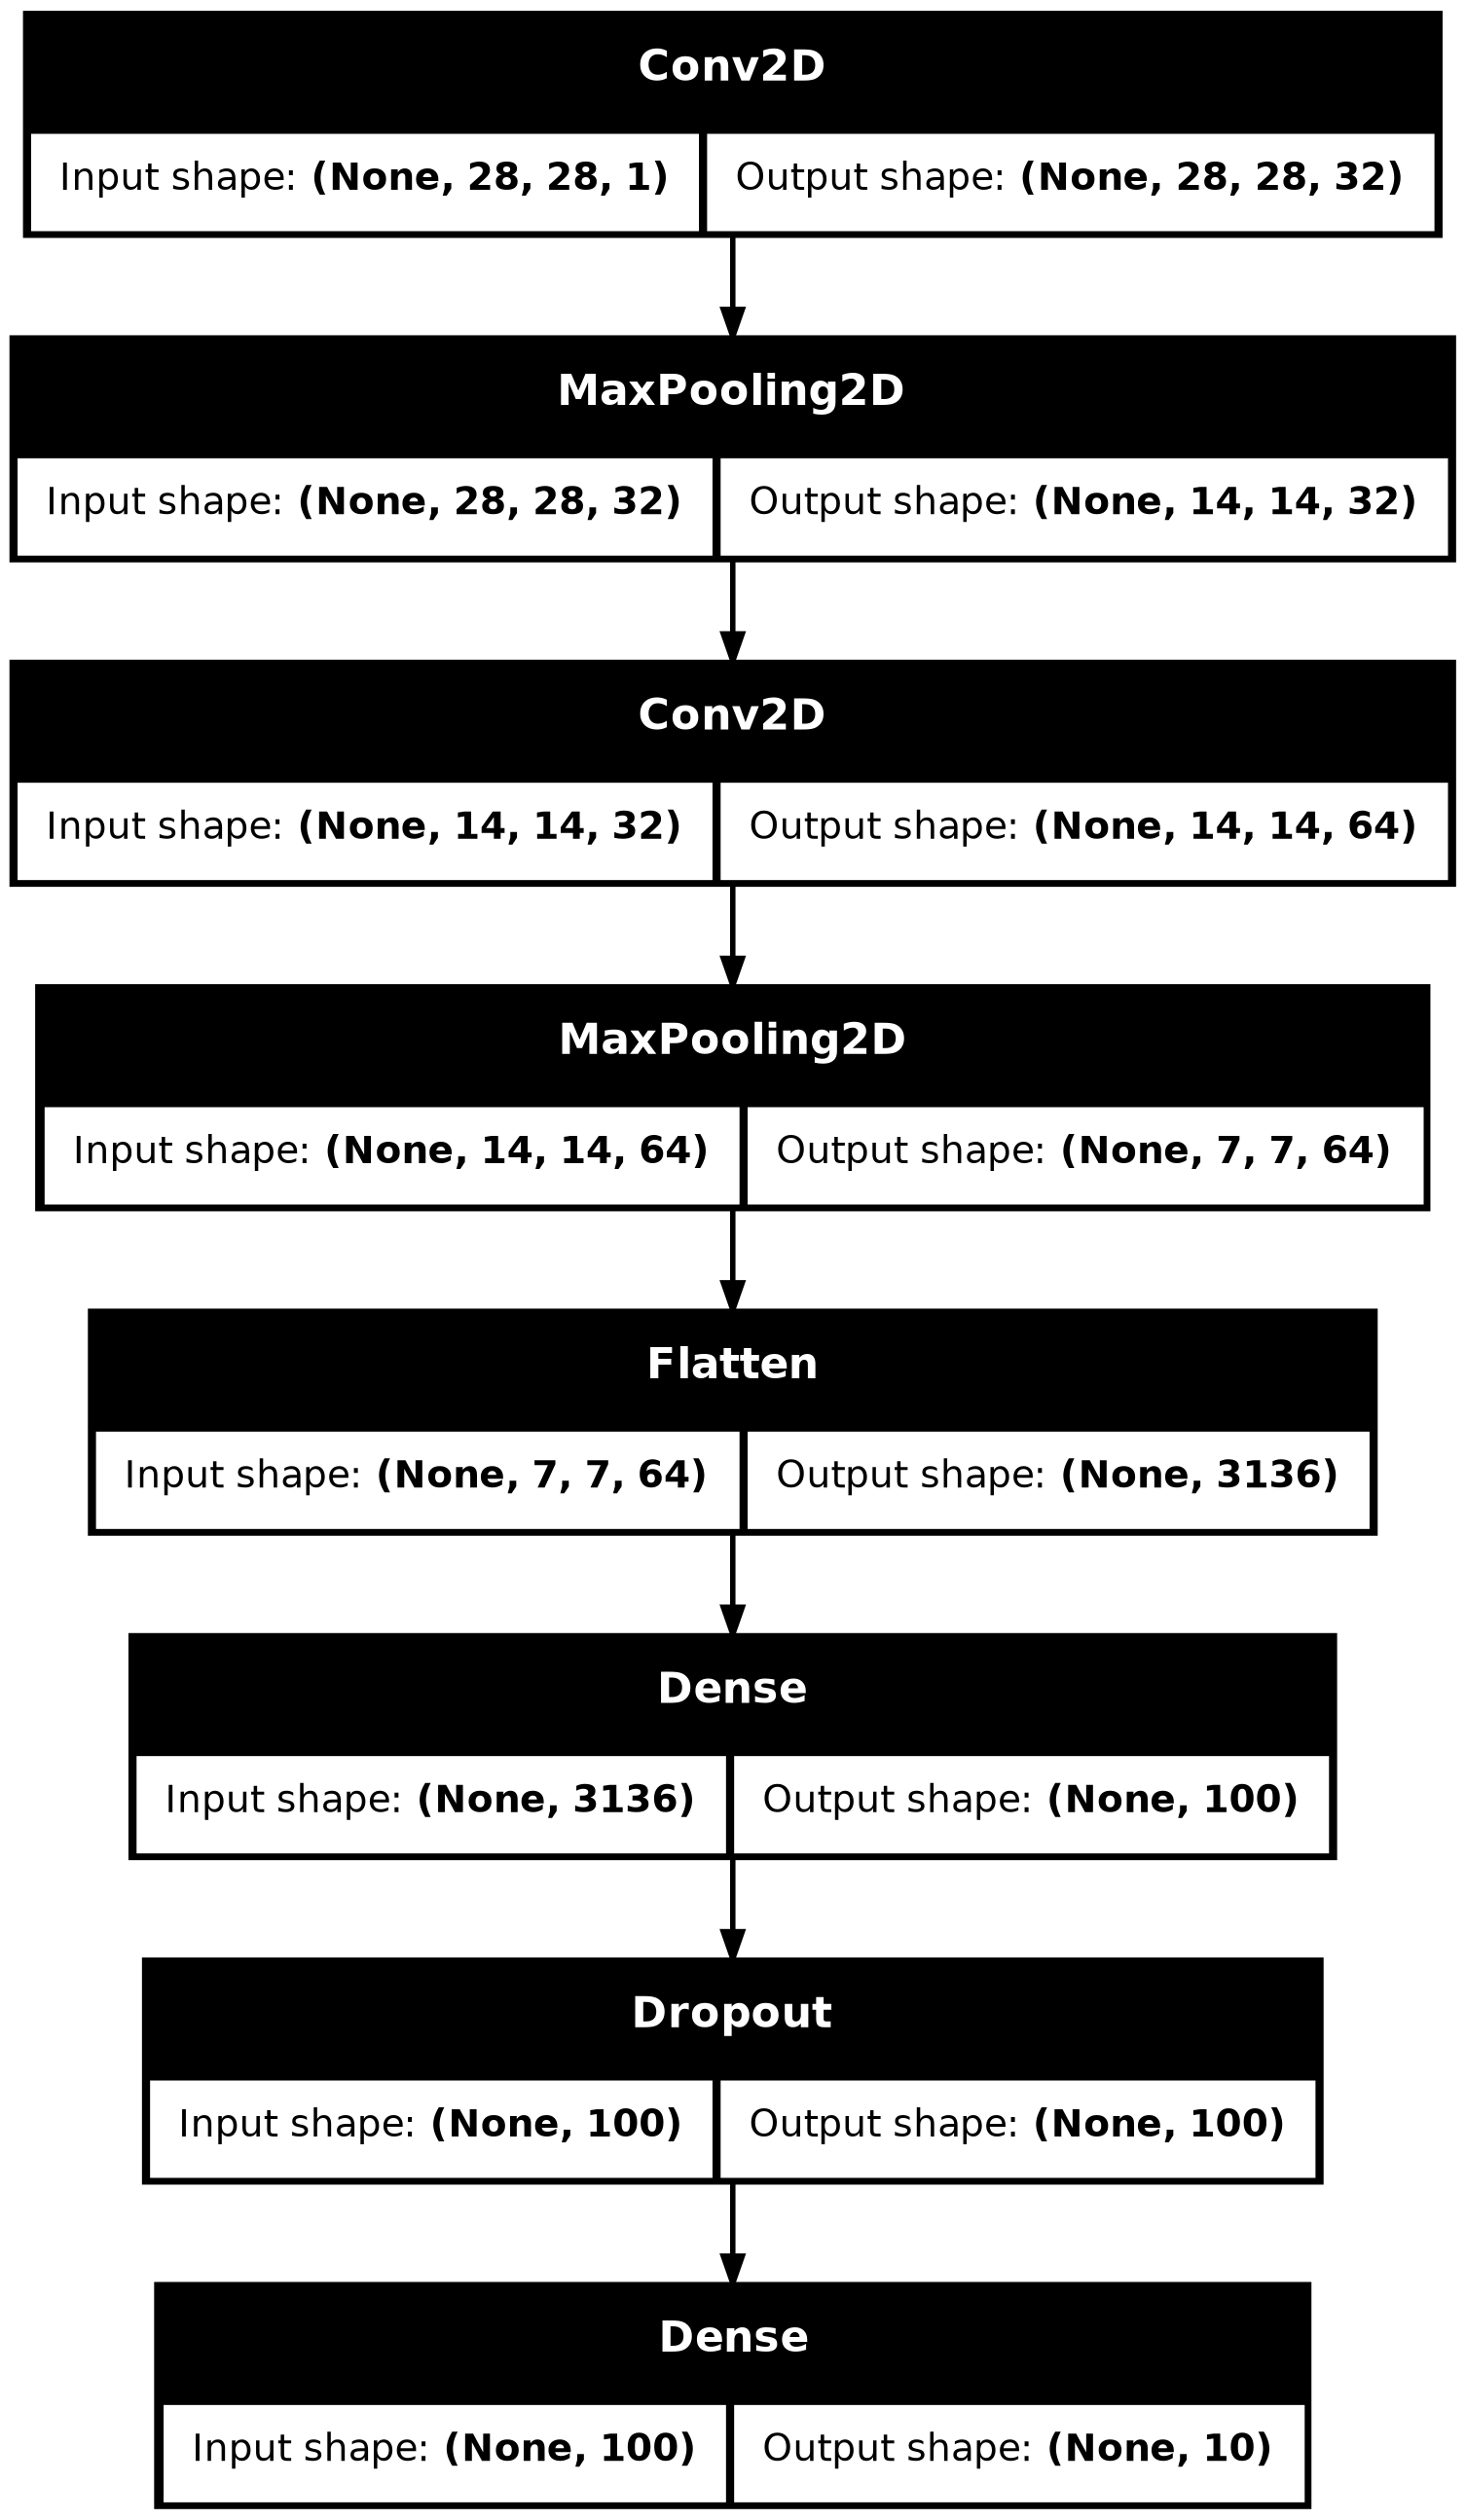

In [28]:
keras.utils.plot_model(model, show_shapes=True)

모델 컴파일과 훈련

In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20


I0000 00:00:1764209845.786296   26428 service.cc:148] XLA service 0x72adf000a850 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764209845.786667   26428 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 4GB Laptop GPU, Compute Capability 8.6
2025-11-27 11:17:25.826142: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1764209846.026252   26428 cuda_dnn.cc:529] Loaded cuDNN version 91002


  37/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3376 - loss: 1.8930

I0000 00:00:1764209848.732856   26428 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7465 - loss: 0.7059 - val_accuracy: 0.8788 - val_loss: 0.3251
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8686 - loss: 0.3649 - val_accuracy: 0.8931 - val_loss: 0.2843
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8892 - loss: 0.3112 - val_accuracy: 0.8932 - val_loss: 0.2723
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8987 - loss: 0.2750 - val_accuracy: 0.9039 - val_loss: 0.2560
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9106 - loss: 0.2445 - val_accuracy: 0.9112 - val_loss: 0.2372
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9157 - loss: 0.2289 - val_accuracy: 0.9149 - val_loss: 0.2342
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9210 - loss: 0.2101 - val_accuracy: 0.9150 - val_loss: 0.2323
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9279 - loss: 0.1921 - val_ac

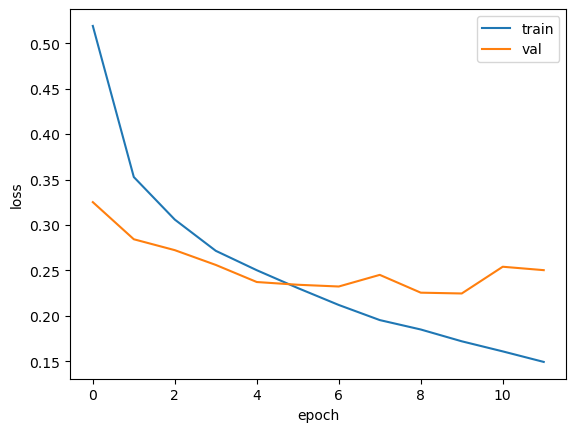

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [32]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9213 - loss: 0.2191


[0.2246178835630417, 0.9207500219345093]

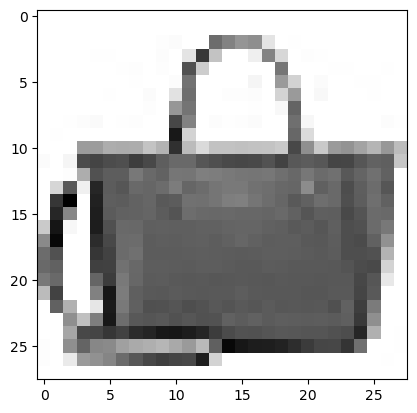

In [33]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [34]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[6.1116361e-14 7.3930537e-24 3.3195082e-17 6.1818434e-16 1.3014633e-14
  6.8056929e-14 1.2653892e-12 6.6174712e-15 1.0000000e+00 2.8098916e-15]]


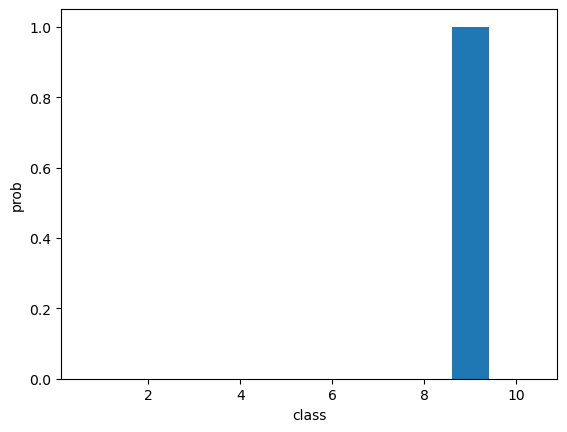

In [35]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

In [36]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [37]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [38]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [39]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9123 - loss: 0.2569


[0.24942384660243988, 0.913100004196167]

### 8-3 합성곱 신경망의 시각화

가중치 시각화

In [40]:
import keras
model = keras.models.load_model('best-cnn-model.keras')

In [41]:
model.layers

[<Conv2D name=conv2d_8, built=True>,
 <MaxPooling2D name=max_pooling2d_6, built=True>,
 <Conv2D name=conv2d_9, built=True>,
 <MaxPooling2D name=max_pooling2d_7, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_3, built=True>]

In [43]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [44]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.0057942485 0.22812392


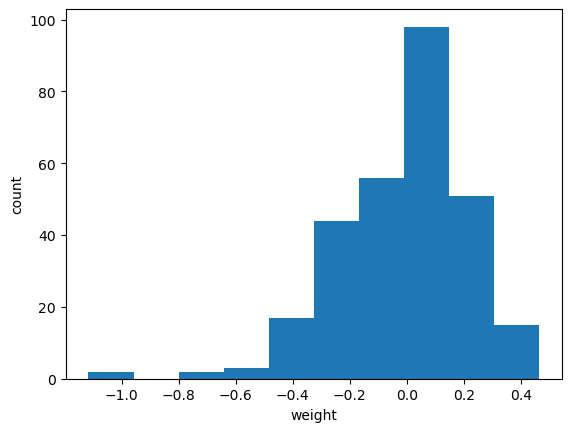

In [45]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

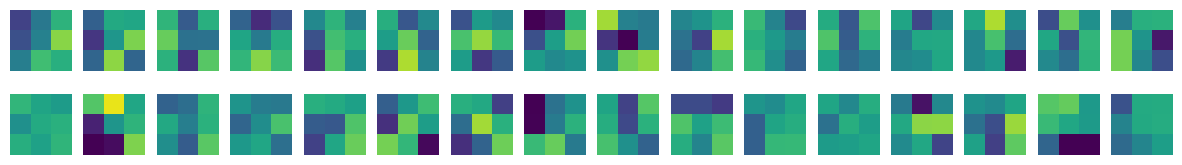

In [46]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [47]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Input(shape=(28,28,1)))
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation=\
                                          'relu', padding='same'))

In [48]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [49]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0052617006 0.08412916


<function matplotlib.pyplot.show(close=None, block=None)>

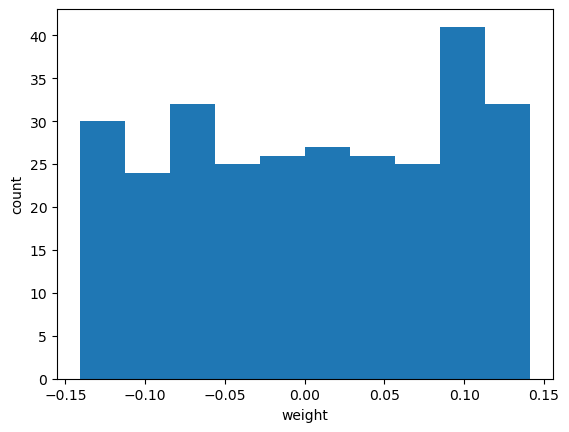

In [50]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show

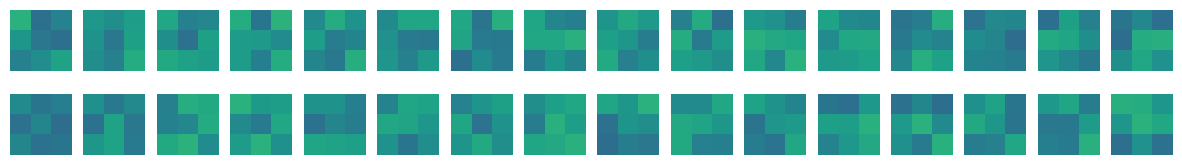

In [51]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5,
                         vmax=0.5)
        axs[i, j].axis('off')
plt.show()

함수형 API

In [52]:
inputs = keras.Input(shape=(784,))
dense1 = keras.layers.Dense(100, activation='relu')
dense2 = keras.layers.Dense(10, activation='softmax')

In [53]:
hidden = dense1(inputs)

In [56]:
outputs = dense2(hidden)

In [58]:
func_model = keras.Model(inputs, outputs)

In [59]:
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer_1>]


In [60]:
conv_acti = keras.Model(model.inputs[0], model.layers[0].output)

특성 맵 시각화

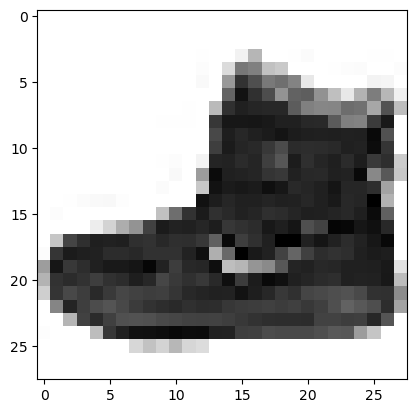

In [61]:
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
plt.imshow (train_input[0], cmap='gray_r')
plt.show()

In [62]:
ankle_boot = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(ankle_boot)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


In [63]:
print(feature_maps.shape)

(1, 28, 28, 32)


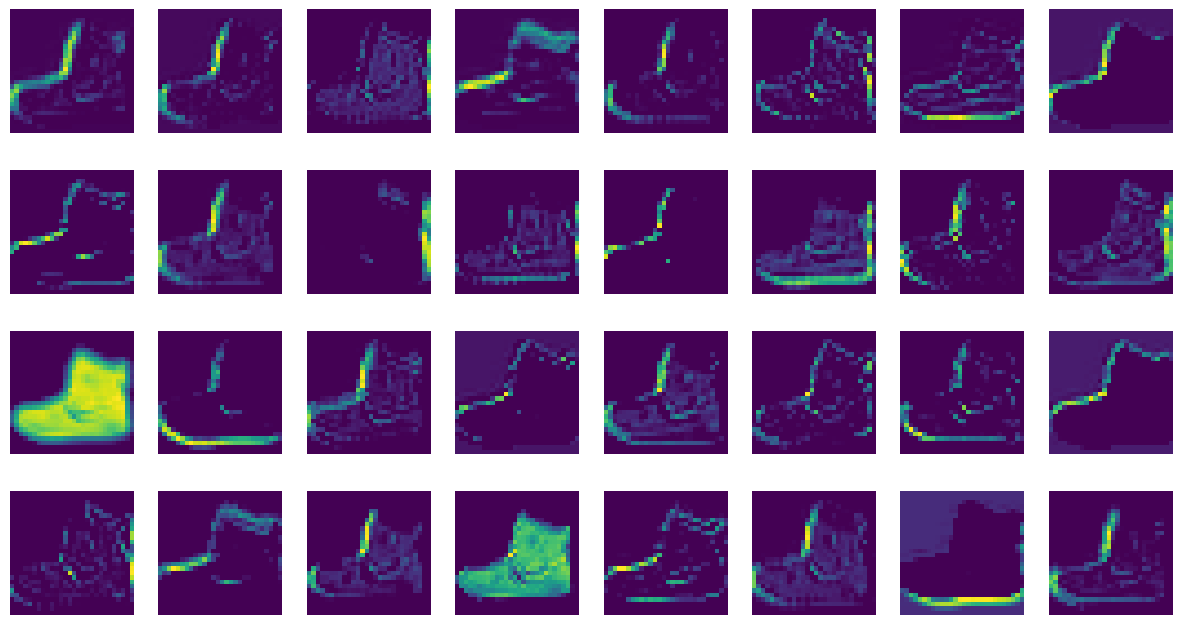

In [64]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()

In [65]:
conv2_acti = keras.Model(model.inputs[0], model.layers[2].output)

In [66]:
feature_maps = conv2_acti.predict(ankle_boot)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


In [68]:
print(feature_maps.shape)

(1, 14, 14, 64)


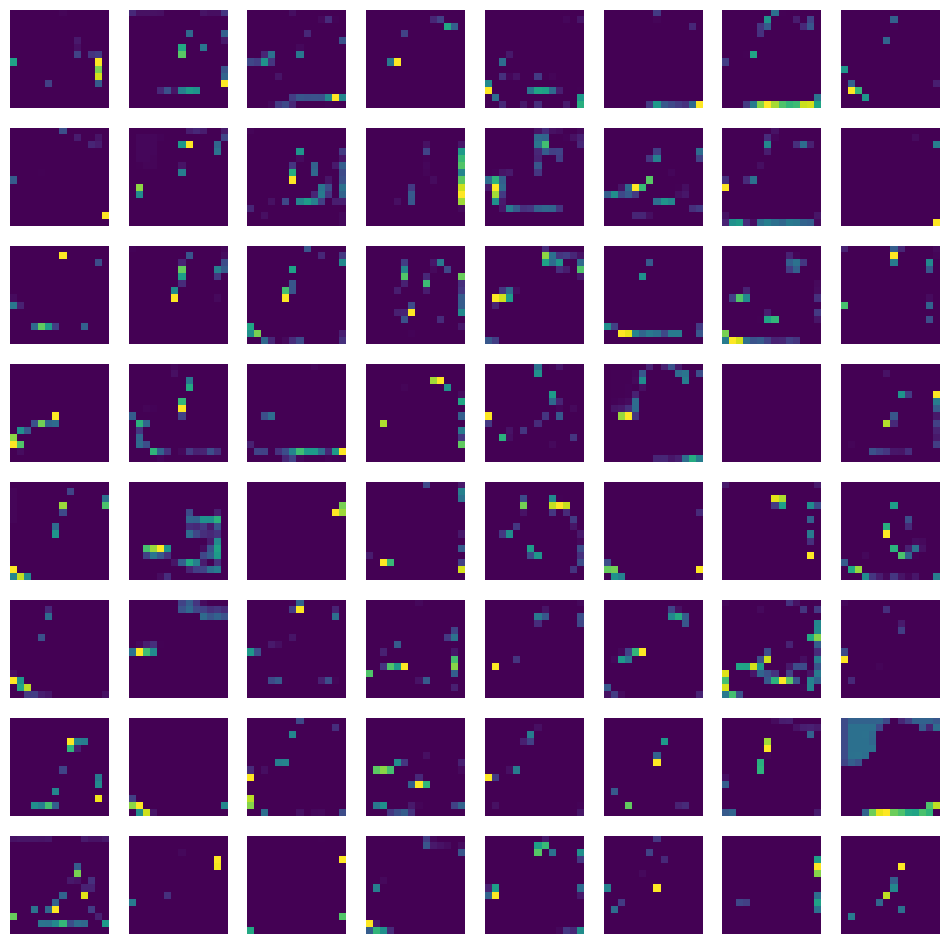

In [69]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()